<a href="https://colab.research.google.com/github/roydendsouza31/AI-Generated-Images-vs-Real-Images/blob/A1/A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**AI Generated Images vs Real Images**



 **1. Install Dependencies and Setup**


In [ ]:
from google.colab import drive
import os
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
!pip install kaggle


**2.Load Data**

In [ ]:
drive.mount('/content/drive')

os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive/kaggle'

!kaggle datasets download -d birdy654/cifake-real-and-ai-generated-synthetic-images

# Define the path to your zip file
file_path = '/content/cifake-real-and-ai-generated-synthetic-images.zip'
!mkdir CIFAKE

# Unzip the file to a specific destination
with zipfile.ZipFile(file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/CIFAKE')


dataset_dir = "/content/CIFAKE"
print("Loading dataset from: " + dataset_dir)

Mounted at /content/drive
 97% 101M/105M [00:00<00:00, 155MB/s] 
100% 105M/105M [00:00<00:00, 146MB/s]
Loading dataset from: /content/CIFAKE


**3.Data Preparation**

In [ ]:
img_height = 32
img_width = 32
batch_size = 32

# Load the training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/train",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Load the validation data
val_ds = tf.keras.utils.image_dataset_from_directory(
  dataset_dir + "/test",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=32)

# Quick sanity check to make sure it's all loaded properly
print("Training Classes:")
class_names = train_ds.class_names
print(class_names)

print("Testing Classes:")
class_names = train_ds.class_names
print(class_names)

Found 100000 files belonging to 2 classes.
Found 20000 files belonging to 2 classes.
Training Classes:
['FAKE', 'REAL']
Testing Classes:
['FAKE', 'REAL']


**4.Displaying Data**

Displaying images from the training dataset:


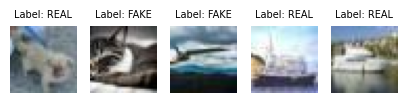

Displaying images from the validation dataset:


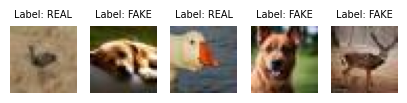

In [ ]:
# Function to display images from a TensorFlow dataset
def display_images(dataset, class_names, num_images=5):
    plt.figure(figsize=(5,6 ))
    for images, labels in dataset.take(1):
        for i in range(min(num_images, len(images))):
            plt.subplot(1, num_images, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(f"Label: {class_names[labels[i]]}",fontsize=7);
            plt.axis("off")
    plt.show()

# Displaying images from the training dataset
print("Displaying images from the training dataset:")
display_images(train_ds, class_names)

# Displaying images from the validation dataset
print("Displaying images from the validation dataset:")
display_images(val_ds, class_names)

**5.Build Model**

In [ ]:
# Building the CNN
layers = []
layers.append(tf.keras.layers.Rescaling(1./255)) # Normalise pixel values
layers.append(tf.keras.layers.Conv2D(32, 3, activation='relu'))
layers.append(tf.keras.layers.MaxPooling2D())
layers.append(tf.keras.layers.Flatten())

# Building the ANN
layers.append(tf.keras.layers.Dense(64, activation='relu'))
layers.append(tf.keras.layers.Dense(1, activation='sigmoid'))

# Create and compile the model from layers
model = tf.keras.Sequential(layers)
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.BinaryCrossentropy(),
  metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()])

# Build the model so we can see a summary
model.build(input_shape=(None, 32, 32, 3))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 7200)              0         
                                                                 
 dense_2 (Dense)             (None, 64)                460864    
                                                                 
 dense_3 (Dense)             (None, 1)                 65        
                                                      

In [ ]:
# Check if GPUs are available for training
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


**6. Train**

In [ ]:
# Finally, train the model

print("Starting training...")
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=5,
  verbose=1
)

print("Training finished.")

Starting training...
Epoch 1/5
3125/3125 [==============================] - 109s 34ms/step - loss: 0.3573 - accuracy: 0.8427 - precision: 0.8313 - recall: 0.8600 - val_loss: 0.3084 - val_accuracy: 0.8807 - val_precision: 0.9222 - val_recall: 0.8316
Epoch 2/5
3125/3125 [==============================] - 102s 33ms/step - loss: 0.2654 - accuracy: 0.8926 - precision: 0.8811 - recall: 0.9076 - val_loss: 0.2522 - val_accuracy: 0.9043 - val_precision: 0.9303 - val_recall: 0.8742
Epoch 3/5
3125/3125 [==============================] - 108s 35ms/step - loss: 0.2353 - accuracy: 0.9069 - precision: 0.8982 - recall: 0.9178 - val_loss: 0.2240 - val_accuracy: 0.9137 - val_precision: 0.9020 - val_recall: 0.9283
Epoch 4/5
3125/3125 [==============================] - 98s 31ms/step - loss: 0.2203 - accuracy: 0.9128 - precision: 0.9051 - recall: 0.9221 - val_loss: 0.2200 - val_accuracy: 0.9146 - val_precision: 0.8973 - val_recall: 0.9363
Epoch 5/5
3125/3125 [==============================] - 87s 28ms/step

**7.Plot Performance**

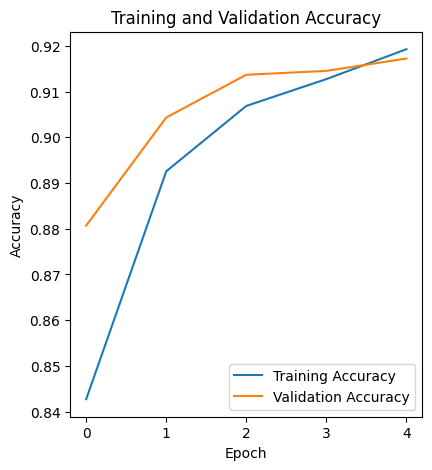

In [ ]:
# Get training and validation accuracy
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Get training and validation loss
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()



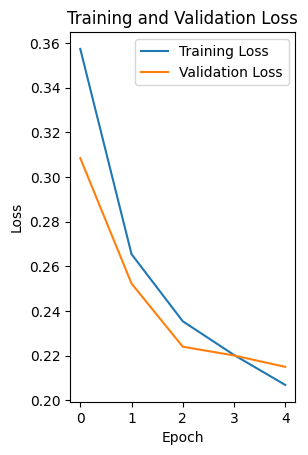

In [ ]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

**8.Evaluate**

In [ ]:
# Evaluate the model
test_loss, test_acc, test_precision, test_recall = model.evaluate(val_ds)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}, Test Precision: {test_precision}, Test Recall: {test_recall}")

625/625 [==============================] - 7s 11ms/step - loss: 0.2149 - accuracy: 0.9172 - precision: 0.9117 - recall: 0.9240
Test Loss: 0.21492734551429749, Test Accuracy: 0.9172499775886536, Test Precision: 0.9116921424865723, Test Recall: 0.9240000247955322


**9.Save Model**

In [ ]:
!mkdir TrainedModelSave
model.save("/content/TrainedModelSavenew") # Saving the model

**10.Test**

1/1 [==============================] - 0s 71ms/step


<ipython-input-27-98c5cdbc9902>:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  predicted_classes = [class_names[int(np.round(prediction))] for prediction in predictions]


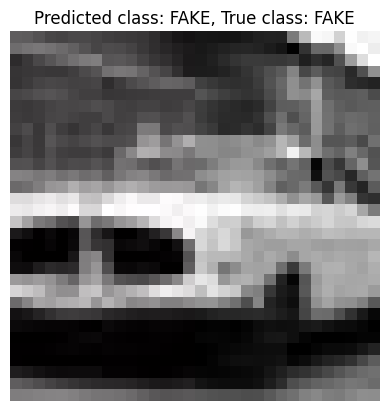

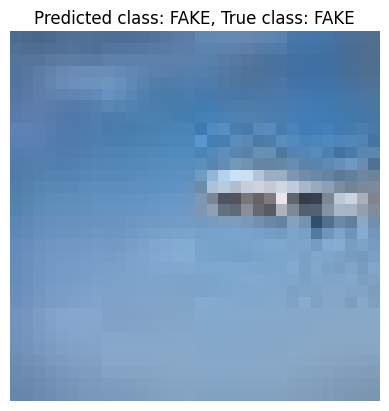

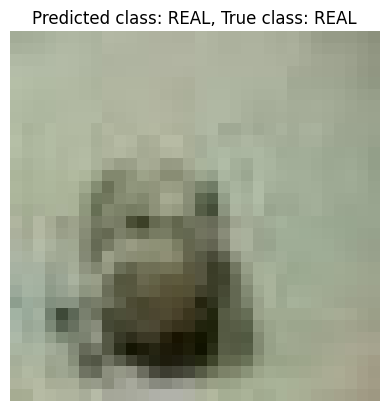

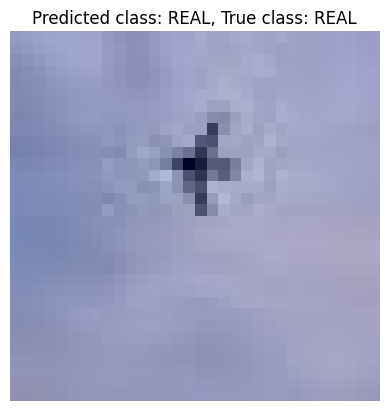

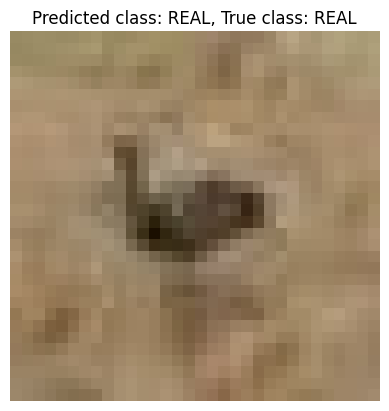

In [ ]:
# Load the saved model
model = tf.keras.models.load_model("/content/TrainedModelSavenew")

# Get a batch of test images and their labels
for images, labels in val_ds.take(1):
    # Classify the images
    predictions = model.predict(images)
    predicted_classes = [class_names[int(np.round(prediction))] for prediction in predictions]

    # Display the images along with their predicted and true classes
    for i in range(5):
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(f"Predicted class: {predicted_classes[i]}, True class: {class_names[int(labels[i])]}")
        plt.axis("off")
        plt.show()
